# mRNA

All data manipulation was done before the start of this quarto manuscript project. Code is in: C:/Users/alosvendsen/OneDrive - Syddansk Universitet/PhD/R_code/manuscript_1 And copied to this project: /notebooks/qPCR/old_qPCR_import

Donor 1: timepoints = 72 and 120 hours Donor 2: timepoints = 24, 72, and 120 hours Donor 2: timepoints = 24, 72, and 120 hours

## Setup

In [ ]:

groundhog.date <- "2024-01-01"
groundhog::meta.groundhog(date = groundhog.date)


Now using 'groundhog_3.1.2'.

here() starts at C:/Users/alosvendsen/Documents/R/manuscript_one

Successfully attached 'here_1.0.1'

Successfully attached 'data.table_1.14.10'

Successfully attached 'ggplot2_3.4.4'

## Finalize the data and save the data table

### Load data, remove 0.001 ng/ml cytokine concentrations, calculate means for each experiment.

In [ ]:
#### Load data, filter data and calculate geometric means
data <- readRDS(here("notebooks/qPCR/data_processed/final_dataframe.rds"))

# Remove the lowest concentrations of cytokines, since not used in all 
# Experiments. Note 24 hour time points was only used in one experiment
plot_data <- data[!treatment %chin% c("0.001 ng/ml IL-1B", "0.001 ng/ml IL-6")]


# Calculate the mean expression grouped by experiment, condition, treatment, and time. USE GEOMETRIC MEAN when averaging normalized expression (RQ) values. 
plot_data[,
          bio_group_mean_expression := geometric_mean(normalized_expression),
          by = .(experiment, condition, treatment, time, target)
          ]

# Save the data
saveRDS(plot_data, here("notebooks/qPCR/data_final_for_plotting/plot_data.rds"))


In [ ]:
rmv <- ls()[!grepl(x =ls(), pattern = "geometric")]

rm(list = rmv)


## Plots

In [ ]:
plot_data <- readRDS(here("notebooks/qPCR/data_final_for_plotting/plot_data.rds"))


#### 3A4 IL-6

In [ ]:
# Subset for 3A4 and IL-6
cyp3A4_IL6 <- plot_data[treatment != "0.0001% BSA" & condition == "IL-6" & target == "CYP3A4"]
cyp3A4_IL6[,
           time_means := geometric_mean(bio_group_mean_expression),
           by = .(treatment, time)
           ]


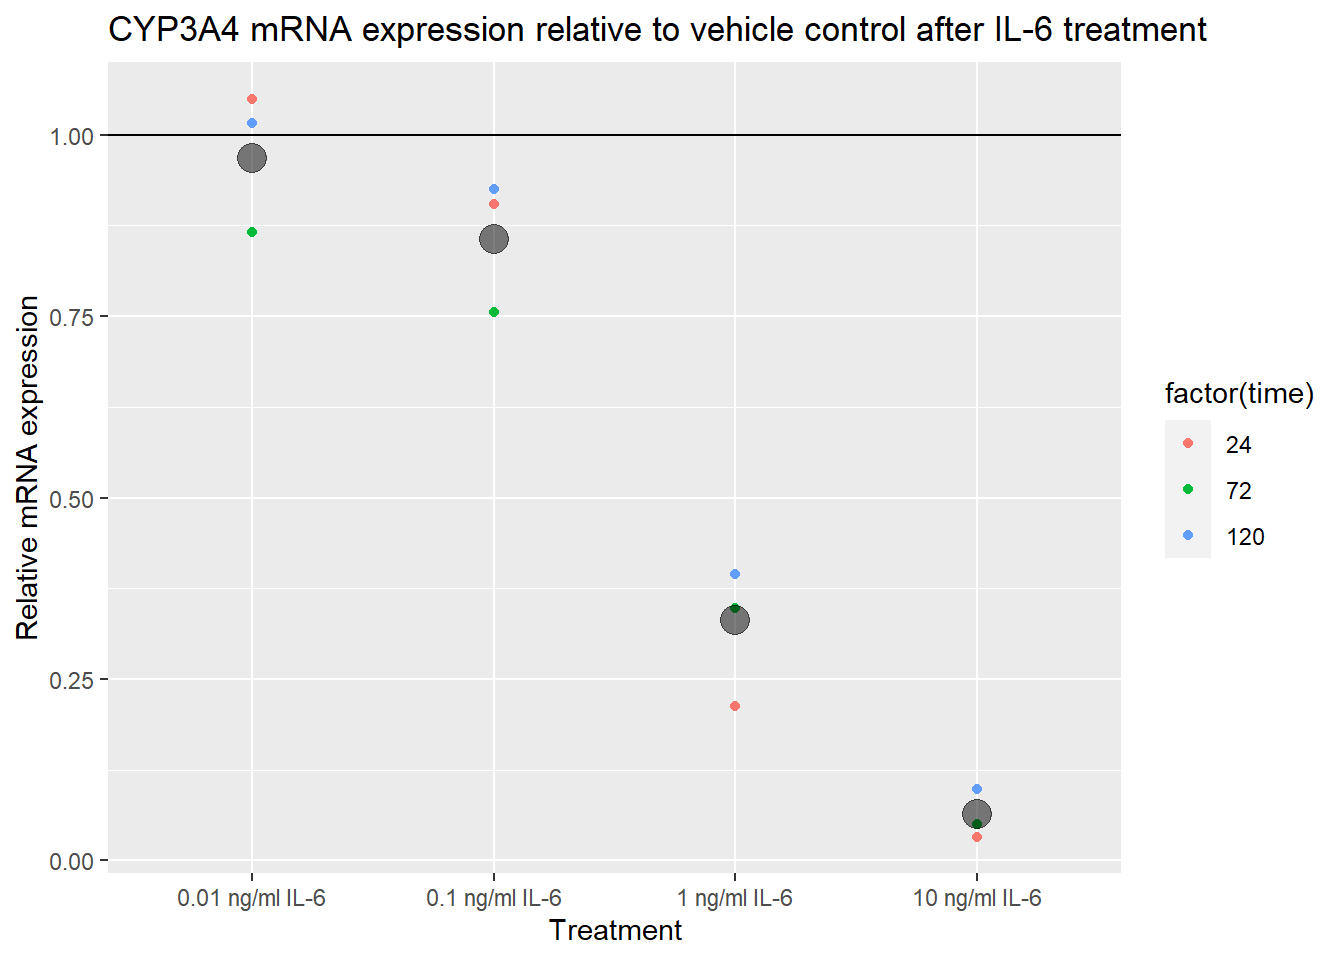

In [ ]:

ggplot(data = cyp3A4_IL6, aes(x = treatment, y = time_means, color = factor(time))) +
  geom_point() +
  stat_summary(fun = "mean", geom = "point", color = "black", size = 5, alpha = 0.5) +
  geom_hline(yintercept = 1) +
  labs(title = "CYP3A4 mRNA expression relative to vehicle control after IL-6 treatment") +
  ylab("Relative mRNA expression") +
  xlab("Treatment")


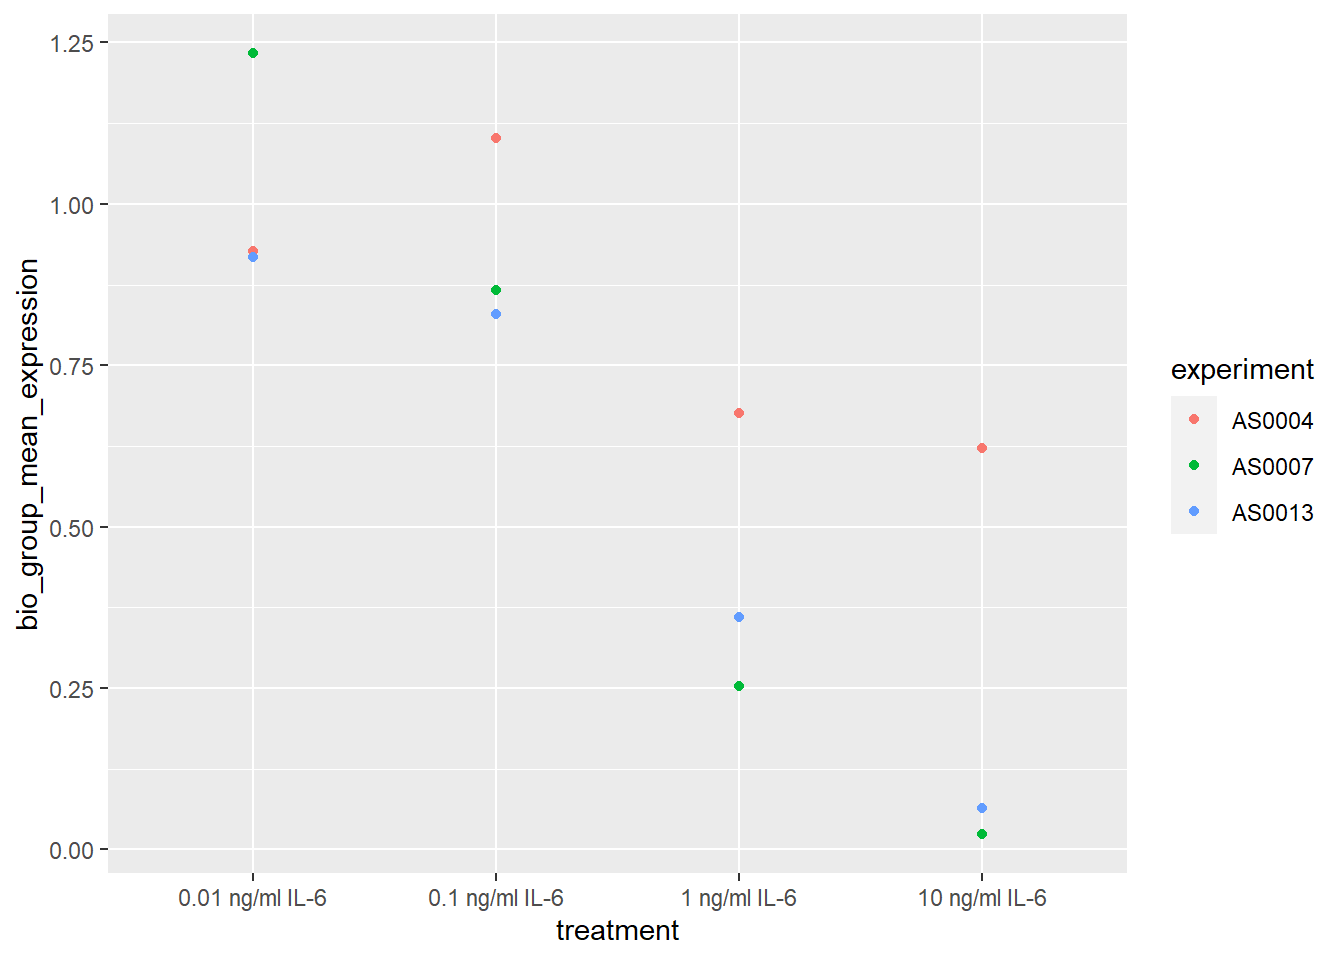

In [ ]:

ggplot(data = cyp3A4_IL6[time == 120], aes(x = treatment, y = bio_group_mean_expression)) +
  geom_point(aes(color = experiment))


In [ ]:
# #### Load data, filter data and calculate geometric means
# data <- readRDS(here("notebooks/qPCR/data_processed/final_dataframe.rds"))
# 
# # Remove the lowest concentrations of cytokines, since not used in all
# # Experiments. Note 24 hour time points was only used in one experiment
# plotting_data <- data[!treatment %chin% c("0.001 ng/ml IL-1B", "0.001 ng/ml IL-6")]
# 
# 
# # Calculate the mean expression grouped by experiment, condition, treatment, and time. USE GEOMETRIC MEAN when averaging normalized expression (RQ) values.
# plotting_data[, bio_group_mean_expression := geometric_mean(normalized_expression), by = .(experiment, condition, treatment, time, target)]
# 
# # Subset for 3A4 and IL-6
# plotting_data_1B <- plotting_data[treatment != "0.0001% BSA" & condition == "IL-1B" & target == "CYP3A4"]
# 
# plotting_data_1B[, time_means := geometric_mean(bio_group_mean_expression), by = .(treatment, time)]
# 
# 
# ggplot(data = plotting_data_1B, aes(x = treatment, y = time_means, color = factor(time))) +
#   geom_point() +
#   stat_summary(fun = "mean", geom = "point", color = "black", size = 5, alpha = 0.5) +
#   geom_hline(yintercept = 1) +
#   labs(title = "CYP3A4 mRNA expression relative to vehicle control after IL-1B treatment") +
#   ylab("Relative mRNA expression") +
#   xlab("Treatment")


In [ ]:
# # Create base plot. Set data = Null, to assign the data later.
# base_plot <-
#   ggplot(
#     data = NULL,
#     mapping = aes(
#       x = treatment,
#       y = mean_expression,
#       color = factor(time),
#       fill = factor(time)
#     )
#   ) +
#   geom_point(shape = 21, 
#              size = 3, 
#              color = "black", 
#              alpha = 0.6,
#              stroke = 1.5
#              ) +
#   scale_fill_viridis_d() +
#   stat_summary(
#     fun = geometric_mean,
#     na.rm = TRUE, 
#     color = "black",
#     alpha = 0.5,
#     size = 1.75
#   ) +
#   geom_hline(yintercept = 1) +
#   theme_bw() +
#   theme(axis.text = element_text(size = 15),
#         axis.text.x = element_text(angle = 45, hjust = 1),
#         strip.text = element_text(size = 15),
#         axis.title.x  = element_text(size = 20, margin = margin(t = 20)),
#         axis.title.y = element_text(size = 20, margin = margin(r = 20))
#         )
# 
# # Filter data for the first condition (e.g., "IL-6")
# data_3A4_condition1 <- data_3A4[condition == "IL-6" & !treatment == "0.001 ng/ml IL-6", ]
# base_plot$data <- data_3A4_condition1
# base_plot
# plot_3A4 <- base_plot


In [ ]:
# # Filter data for the first condition (e.g., "IL-6")
# data_3A4_condition1 <- data_3A4[condition == "IL-6", ]
# 
# # Plot for the first condition
# ggplot(data_3A4_condition1, aes(x = treatment, y = mean_expression, color = factor(time))) +
#   geom_point() +
#   theme_bw() +
#   labs(title = "Condition: IL-6",
#        x = "Treatment",
#        y = "Mean Expression",
#        color = "Time (hours)") +
#   theme(axis.text.x = element_text(angle = 45, hjust = 1))
# ```
# 
# ```{r}
# # Filter for CYP enzymes only
# cyp_data <- data[target %like% "CYP"]
# 
# # Split data based on condition
# cyp_data_IL6 <- cyp_data[condition == "IL-6"]
# cyp_data_IL1B <- cyp_data[condition == "IL-1B"]
# 
# # Define a function to create the plot
# create_plot <- function(cyp_data) {
#   # Calculate mean normalized expression for each combination of CYP enzyme, treatment, and experiment
#   cyp_means <- cyp_data[, .(mean_normalized_expression = mean(normalized_expression)), 
#                         by = .(experiment, treatment, target, time)]
# 
#   # Calculate the overall mean across experiments
#   cyp_overall_means <- cyp_means[, .(overall_mean_normalized_expression = mean(mean_normalized_expression)), 
#                                  by = .(treatment, target, time)]
# 
#   # Create and return the plot
#   ggplot() +
#     geom_point(data = cyp_means, aes(x = treatment, y = mean_normalized_expression, color = target), alpha = 0.5) +
#     geom_point(data = cyp_overall_means, aes(x = treatment, y = overall_mean_normalized_expression), 
#                color = "black", size = 3, shape = 18) +
#     facet_wrap(~ target + time, ncol = 3) +
#     labs(x = "Treatment", y = "Mean Normalized Expression") +
#     theme_minimal() +
#     theme(axis.text.x = element_text(angle = 45, hjust = 1))
# }
# 
# # Create plots
# plot_IL6 <- create_plot(cyp_data_IL6)
# plot_IL1B <- create_plot(cyp_data_IL1B)
# 
# # You can now view, save, or further manipulate these plots:
# plot_IL6
# plot_IL1B
